Initializing pandarallel...
INFO: Pandarallel will run on 12 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


/tmp/ipykernel_63542/1426829924.py:7: DtypeWarning: Columns (277) have mixed types. Specify dtype option on import or set low_memory=False.
  my_lakes_df = pd.read_csv(my_lakes_csv_path)


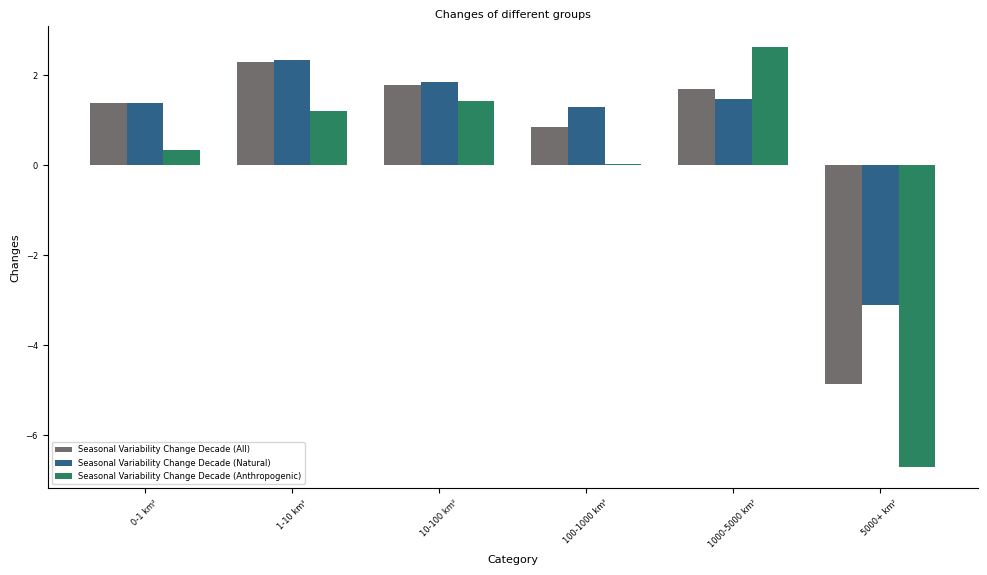

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import correlation_plots

my_lakes_csv_path = '/WORK/Data/global_lake_area/area_csvs/lakes/csv/lakes_all_with_aridity_index.csv'
my_lakes_df = pd.read_csv(my_lakes_csv_path)
#my_lakes_df = my_lakes_df[my_lakes_df['Lake_area'] <= 1.0]
my_lakes_df['linear_trend_of_standard_deviation_percentage_per_period'] = my_lakes_df['linear_trend_of_standard_deviation_percentage_per_period'] * 10
my_lakes_df['linear_trend_of_standard_deviation_percentage_per_period_natural'] = my_lakes_df.apply(lambda row: row['linear_trend_of_standard_deviation_percentage_per_period'] if row['Lake_type'] == 1 else np.nan, axis=1)
my_lakes_df['linear_trend_of_standard_deviation_percentage_per_period_anthropogenic'] = my_lakes_df.apply(lambda row: row['linear_trend_of_standard_deviation_percentage_per_period'] if row['Lake_type'] != 1 else np.nan, axis=1)
to_plot_column_names = [
    'linear_trend_of_standard_deviation_percentage_per_period',
    'linear_trend_of_standard_deviation_percentage_per_period_natural',
    'linear_trend_of_standard_deviation_percentage_per_period_anthropogenic'
]
to_plot_column_labels = [
    'Seasonal Variability Change Decade (All)',
    'Seasonal Variability Change Decade (Natural)',
    'Seasonal Variability Change Decade (Anthropogenic)'
]
to_plot_column_colors = [
    '#716e6d',
    '#30638a',
    '#2a8560'
]
agg_to_bar_stat_types = [
    'median',
    'median',
    'median'
]
to_group_by_column_name = 'mean_area'
group_bins = [0, 1, 10, 100, 1000, 5000, np.inf]
group_labels = ['0-1 km²', '1-10 km²', '10-100 km²', '100-1000 km²', '1000-5000 km²', '5000+ km²']

correlation_plots.bar_plot_of_different_groups(
    to_plot_df=my_lakes_df,
    to_plot_column_names=to_plot_column_names,
    to_plot_column_colors=to_plot_column_colors,
    to_plot_column_labels=to_plot_column_labels,
    agg_to_bar_stat_types=agg_to_bar_stat_types,
    to_group_by_column_name=to_group_by_column_name,
    group_bins=group_bins,
    group_labels=group_labels,
    bar_width=0.25,
    xticklabel_rotation=45,
    show_plot=False
)

plt.savefig('median_seasonality_relative_changes_by_lake_size_bar.pdf', format='pdf', bbox_inches='tight')